# Analise de dados do Airbnb - Porto (Portugal)
O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atividade**. Ah, o detalhe é que ela **não possui nenhum hotel!**

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada a 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Umas das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

<center><img alt='Analisando Airbnb' width='10%' src='https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg'></center>

**Nesse notebook, iremos analisar os dados referente a cidade de Porto em Portugal, e ver quais insights pode ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para essa analise exploratória inicial, será baixado apenas o seguinte arquivo:

* listings.csv - Summary information and metrics for listings in Porto (good for visualisations).

Importante: O portal está em constante evolução, e em determinado momento pode ser que o conjunto de dados utilizado nesse notebook não esteja mais disponivel, o que quebraria nosso código.

Vamos ao projeto:

In [1]:
# importando pacotes necessário
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importando arquivo .csv
DATA_PATH = 'listings.csv'
df = pd.read_csv(DATA_PATH)

# Dimenssão do DataSet
print('Dimenssão do Dataset: \n',
     'Variáveis: ',df.shape[1],'\n',
     'Entradas: ',df.shape[0])

Dimenssão do Dataset: 
 Variáveis:  16 
 Entradas:  10917


## Analise dos Dados
**Dicionário de variáveis**

* `id` - Número de id gerado para identificar o imóvel.
* `name` - Nome da propriedade anunciada.
* `host_id` - Número do id do proprietário (anfitrião) da propriedade.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - Distritos dentro da cidade do Porto.
* `neighbourhood` - Nome do bairro.
* `latitude` - Coordenada da latitude da propriedade.
* `longitude` - Coordenada da longitude da propriedade.
* `room_type` - Informa o tipo de quarto que é oferecido.
* `price` - Preço para alugar o imóvel.
* `minimum_nights` - Quantidade minima de noites para alugar.
* `number_of_reviews` - Número de avaliações que a propriedade possui.
* `last_review` - Data da ultima avaliação.
* `reviews_per_month` - Quantidade de avaliação por mês.
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião.
* `availability_365` - Número de dias de disponibilidade dentro dos 365 dias.

Vamos analisar a primeiras linhas do Dataset:

In [2]:
# Ler as 5 primerias linhas do Dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,95,5,17,2018-08-19,0.19,1,0
1,42462,Large Penthouse in Vila Nova Gaia,185492,Gabriela,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,41.10739,-8.59430,Entire home/apt,73,90,39,2015-07-22,0.38,3,0
2,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-05-07,0.19,3,0
3,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.11,3,0
4,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,20,2,136,2019-04-26,1.16,6,160


## Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui?, Qual tipos das variáveis?.

Vamos identificar a quantidade de linhas e colunas que nosso conjunto de dados possui, e ver o tipo de cada coluna.

Esse dataset que baixamos contem informações resumidas e métricas para hospedagem no Porto.

In [3]:
# identificar o volume de dados do Dataframe
print('Valume de dados do Dataframe: \n',
     'Quantidade de colunas:',df.shape[0], '\n',
     'Quantidade de linhas: ',df.shape[1])

# tipo de dados de cada coluna
print('--------------------------------')
print('Tipo de dados: \n')
print(df.dtypes)

Valume de dados do Dataframe: 
 Quantidade de colunas: 10917 
 Quantidade de linhas:  16
--------------------------------
Tipo de dados: 

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


## Q2. Qual a porcentagem de valores ausentes no dataset?

A qualidade de um dataset está diretamente ralacionado a quantidade de valores ausentes. É importante entende logo no inicio se esses valores nulos são significativos comparando ao total de entradas.

* As colunas `last_review` e `reviews_per_month` possuem em torno de 19% de valores nulos, ambas com 2131 linhas

In [4]:
# ordenar de forma decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

last_review                       19.520015
reviews_per_month                 19.520015
name                               0.009160
host_name                          0.009160
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [63]:
# quantidade de linhas com valores nulos nas colunas last_review e reviews_per_month
print('Qtd. de linhas com valores nulos na coluna lat_review: ',df.last_review.isnull().sum())
print('Qtd. de linhas com valores nulos na coluna reviews_per_month: ',df.reviews_per_month.isnull().sum())

Qtd. de linhas com valores nulos na coluna lat_review:  2131
Qtd. de linhas com valores nulos na coluna reviews_per_month:  2131


## Q3. Qual tipo de distribuição das variáveis?

Para identificar a distribuição, irei plotar o histograma das variáveis.

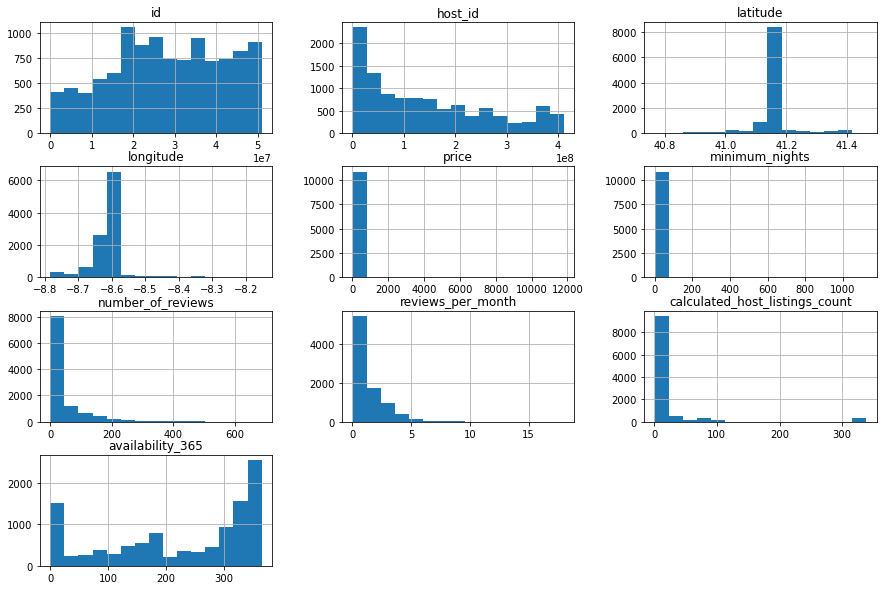

In [5]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))
plt.show()

## Q4. Identificar Outliers.

`Outliers são dados que se diferenciam drasticamente de todos os outros.`

Para distribuição do histograma é possível verificar indicios de presença de outliers. Olhe por exemplo as variáveis `price`e `minimum_nights`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, a duas maneiras rápidas que auxiliam a detecção de outliers:

* Resumo estátistico por meio do `describe()`
* Plotar boxplots para a variável

In [23]:
# ver um resumo estatistico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
   'calculated_host_listings_count', 'availability_365']].describe().round(3)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10917.000,10917.000,10917.000,8786.000,10917.000,10917.000
mean,93.127,3.413,40.464,1.275,20.359,223.067
std,329.698,19.104,69.340,1.390,59.682,128.317
min,8.000,1.000,0.000,0.010,1.000,0.000
25%,43.000,1.000,1.000,0.240,1.000,122.000
50%,64.000,2.000,10.000,0.785,4.000,270.000
75%,91.000,2.000,48.000,1.900,9.000,338.000
max,11799.000,1123.000,687.000,18.000,338.000,365.000


Olhando o resumo das estatisticas podemos ter alguma hipótese nas colunas price e minimum_nights

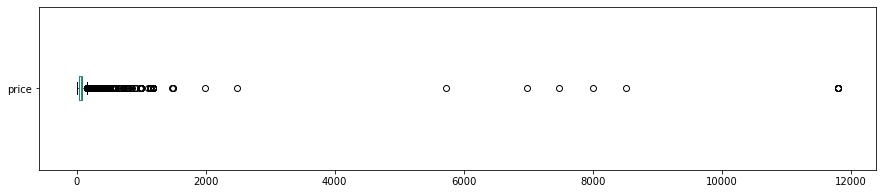

price valores a cima de 1500: 
 13 Entradas 
 0.1191%


In [29]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver a quantidade de valores a cima de 1500 
print('price valores a cima de 1500: \n',
     '{} Entradas'.format((len(df[df.price > 1500]))), '\n',
     '{:.4f}%'.format((len(df[df.price > 1500]) / df.shape[0]) * 100))

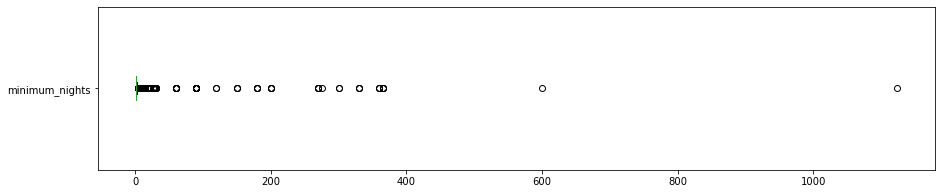

minimum_nights valores a cima de 30 dias: 
 56 Entradas 
 0.5130%


In [32]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores a cima de 30 dias
print('minimum_nights valores a cima de 30 dias: \n',
     '{} Entradas'.format((len(df[df.minimum_nights > 30]))), '\n',
     '{:.4f}%'.format(((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100)))

## Histograma sem outliers

Vamos limpar o Dataframe dos outliers que foram identificados nas variáveis `price` e `minimum_nights`

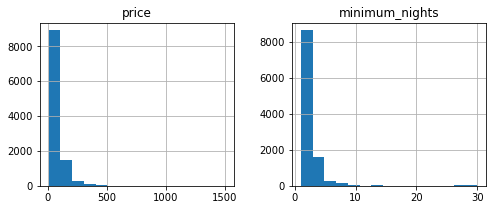

In [48]:
# remover os outliers em um novo Dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar histograma para as variáveis que foram feito as limpeza
df_clean[['price', 'minimum_nights']].hist(bins=15, figsize=(8,3));
#df_clean.hist(bins=15, figsize=(15,10))

Na plotagem a cima, pode já verificar uma melhor distribuição dentro do histograma.

## Q5. Qual a média dos preços dos aluguel

Vamos identificar qual a média dos valores no geral, e separado por distritos e bairro na região do Porto.

In [49]:
# média da coluna price
print('Média dos preços dos aluguéis: ',df_clean.price.mean())

Média dos preços dos aluguéis:  83.06277654867256


In [50]:
print('Média dos preços por bairro, os 10 bairro mais caro:')
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

Média dos preços por bairro, os 10 bairro mais caro:


neighbourhood
Negrelos (São Tomé)                  600.000000
Cristelo                             394.000000
Touguinha e Touguinhó                276.142857
Recarei                              250.000000
São Miguel do Mato                   246.000000
Areias, Sequeiró, Lama e Palmeira    243.800000
Sandim, Olival, Lever e Crestuma     240.538462
Avintes                              237.555556
Melres e Medas                       233.625000
Junqueira                            212.500000
Name: price, dtype: float64

In [51]:
print('Média dos preços por por distrito, os 10 distrito mais caro')
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

Média dos preços por por distrito, os 10 distrito mais caro


neighbourhood_group
SANTO TIRSO          165.117647
AROUCA               138.891892
GONDOMAR             138.594828
VALE DE CAMBRA       133.140000
PAREDES              124.660000
TROFA                116.777778
VILA DO CONDE        102.956989
PÓVOA DE VARZIM       91.277551
VILA NOVA DE GAIA     89.229876
ESPINHO               85.554688
Name: price, dtype: float64

Como pode ver a cima, o bairro Negrelos (São Tomé) que pertence ao distrito do SANTO TIRSO, tem um dos aluguéis mais caro de Porto.

## Q6. Qual a correlação existente entre as variáveis

Correlaçao significa que existe uma relação entre duas coisa, no nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e a função do coeficiente de correlação estabelece qual a relação dela. Para identificar qual a correlação existentes entre as variáveis de interesse:

* Criar uma matriz de correlação.
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn.

In [65]:
# criar matriz de correlação
corr = df_clean[['price', 'minimum_nights','number_of_reviews','reviews_per_month',
                 'calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.080513,-0.093590,-0.126434,-0.057645,0.069334
minimum_nights,0.080513,1.000000,-0.017199,-0.072654,-0.050596,-0.075044
number_of_reviews,-0.093590,-0.017199,1.000000,0.720358,0.055860,0.009237
reviews_per_month,-0.126434,-0.072654,0.720358,1.000000,0.182640,0.079993
calculated_host_listings_count,-0.057645,-0.050596,0.055860,0.182640,1.000000,0.113373
availability_365,0.069334,-0.075044,0.009237,0.079993,0.113373,1.000000


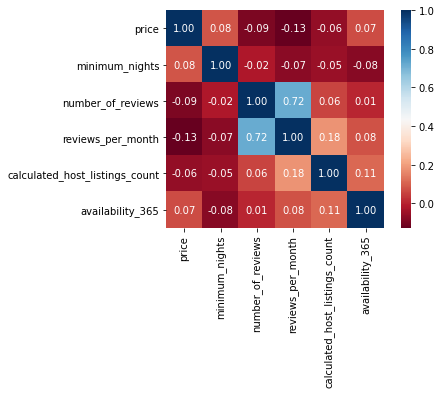

In [53]:
# criar gráfico heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f',square=True, linecolor='white', annot=True);

## Q7. Qual tipo de imóvel mais alugado no Airbnb.

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existe opções de apartamentos/casas inteiras, apenas aluguel de um quarto, ou mesmo dividir quarto com outras pessoas.

Vamos contar a quantidade de ocorrèncias de cada tipo de aluguel, usando o método `value_counts()`.

In [54]:
# mostrar a quantidade de cada tipo de imóvel
df_clean.room_type.value_counts()

Entire home/apt    8579
Private room       1996
Hotel room          164
Shared room         109
Name: room_type, dtype: int64

In [55]:
# mostrar a porcentagem de cada tipo de imóvel disponivel
(df_clean.room_type.value_counts() / df_clean.shape[0] * 100)

Entire home/apt    79.083702
Private room       18.399705
Hotel room          1.511799
Shared room         1.004794
Name: room_type, dtype: float64

## Q8. Plotar mata pela latitude e longitude

Como são fornecido a longitude e latitude, é possivel plotar cada ponto.

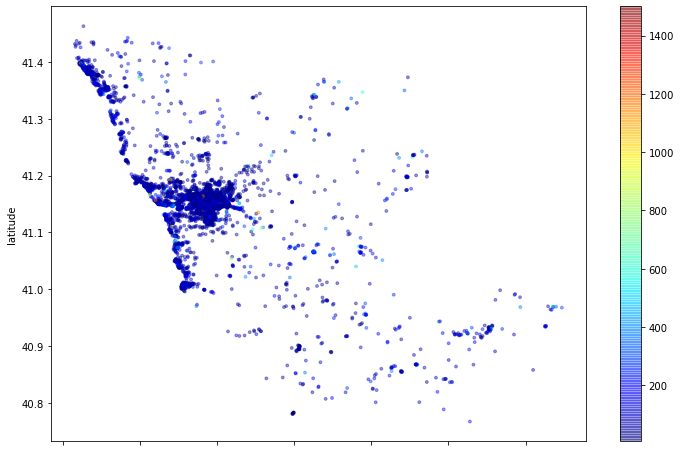

In [60]:
# plotar os imóveis pela localização
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
       cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusão

Foi feito apensa uma analise superficial na base de dados do Airbnb, porem já se percebeu outliers, valores ausentes em algumas variáveis.

No Porto é dividido em vários distritos, e se percebe que os imóveis mais caros ficam na mesma localidade que o distrito e o bairro.

Por fim, lembrar que esse dataset é uma versão resumida, ideial para apenas uma abordagem inicial. Recomendace que sejá usado em uma nova analise exploratória, o conjunto de dados completo.